In [1]:
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from math import ceil
import pandas as pd 
import cv2 as cv
import os
import numpy as np
from numpy import zeros
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sk
import keras 
from PIL import Image, ImageEnhance
import random
from tensorflow.keras import datasets, layers, models
%matplotlib inline

# Functions

In [2]:

###########################################################################
def load_data(dir_list, image_size):


    # load all images in a directory
    data = []
    label = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):

            image = cv.imread(directory + '\\' + filename,0)

            image = cv.resize(image, dsize=(image_width, image_height), interpolation=cv.INTER_CUBIC)

            image = image / 255.

            data.append(image)

            if directory == 'yes':
                label.append([1]) ## have tumor
            else:
                label.append([0]) ## donot have tumor 

    data_array = np.array(data)
    label = np.array(label) 
    return data_array, label
#------------------------------------------------
def replace_argmax(array,to_array=True):
    lst=[]
    for item in array :
        arg_max=np.argmax(item)
        lst.append([arg_max])
    if to_array==True :
        lst=np.array(lst)
    return lst
#---------------------------------------
def predict_on_custome_image(img_path,img_or_directory=False,plot=False):
    dict_1={}
    if img_or_directory==False :
        array=cv.imread(img_path,0)
        
        shape_array=array.shape
        array_1=cv.resize(array,(100,100))
        y,x=array_1.shape

        array=array_1.reshape(1,y,x)
        #-------
#         print(array.shape)
        y_predict=Model.predict(array)
        y_predict_res=replace_argmax(y_predict)


        if y_predict_res==np.array([0]) :
            predicted='do not have tumor'
            
        else : 
            predicted='have tumor'
        
        dict_1.update({img_path:predicted})
        if plot==True :
            plt.imshow(array_1,cmap='gray')
            plt.title(predicted)
            plt.axis('off')
    else :
        all_img=os.listdir(img_path)
        image_count=len(all_img)
        
        if plot==True :
            rows,columns=3,ceil(image_count/3)
            fig = plt.figure(figsize=(10, 7))
            
        for c,path in enumerate(all_img) :
            array=cv.imread(img_path+'/'+path,0)
        
            shape_array=array.shape
            array_1=cv.resize(array,(100,100))
            y,x=array_1.shape

            array=array_1.reshape(1,y,x)
        #-------
            
            y_predict=Model.predict(array)
            y_predict_res=replace_argmax(y_predict)
            if y_predict_res==np.array([0]) :
                predicted='do not have tumor'
            
            else : 
                predicted='have tumor'
            dict_1.update({path:predicted})
            if plot==True :
                fig.add_subplot(rows, columns, c+1)
                plt.imshow(array_1,cmap='gray')
                plt.title(predicted)
                plt.axis('off')
    return dict_1           
# b=predict_on_custome_image('no',img_or_directory=True)
# print(b)
#-------------------------------------------------------
        


In [19]:
b=predict_on_custome_image('no',img_or_directory=True)
print(b)
g=0
lst=[]
for key,value in b.items():
    if value!='do not have tumor':
        lst.append(key)
        g+=1
print(g/len(b))
print(len(b))
print(lst)
print(len(lst))

0.06266666666666666
1500
['no1020.jpg', 'no1033.jpg', 'no1052.jpg', 'no1065.jpg', 'no1096.jpg', 'no114.jpg', 'no1140.jpg', 'no1186.jpg', 'no1225.jpg', 'no1228.jpg', 'no1235.jpg', 'no1236.jpg', 'no1254.jpg', 'no1265.jpg', 'no1284.jpg', 'no1285.jpg', 'no1304.jpg', 'no1340.jpg', 'no1359.jpg', 'no1407.jpg', 'no1415.jpg', 'no1432.jpg', 'no1447.jpg', 'no1451.jpg', 'no1477.jpg', 'no158.jpg', 'no163.jpg', 'no21.jpg', 'no225.jpg', 'no235.jpg', 'no271.jpg', 'no28.jpg', 'no287.jpg', 'no320.jpg', 'no344.jpg', 'no359.jpg', 'no361.jpg', 'no364.jpg', 'no368.jpg', 'no377.jpg', 'no378.jpg', 'no382.jpg', 'no386.jpg', 'no387.jpg', 'no398.jpg', 'no406.jpg', 'no41.jpg', 'no425.jpg', 'no444.jpg', 'no445.jpg', 'no46.jpg', 'no475.jpg', 'no478.jpg', 'no481.jpg', 'no491.jpg', 'no492.jpg', 'no5.jpg', 'no50.jpg', 'no500.jpg', 'no504.jpg', 'no529.jpg', 'no537.jpg', 'no543.jpg', 'no551.jpg', 'no555.jpg', 'no584.jpg', 'no610.jpg', 'no652.jpg', 'no669.jpg', 'no678.jpg', 'no693.jpg', 'no713.jpg', 'no717.jpg', 'no721.j

In [22]:
b_2=predict_on_custome_image('yes',img_or_directory=True)
print(b_2)
g_2=0
lst_2=[]
for key,value in b_2.items():
    if value!='have tumor':
        lst_2.append(key)
        g_2+=1
print(g_2/len(b_2))
print(len(b_2))
print(lst_2)
print(len(lst_2))

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step
{'y0.jpg': 'have tumor', 'y1.jpg': 'have tumor', 'y10.jpg': 'have tumor', 'y100.jpg': 'have tumor', 'y1000.jpg': 'have tumor', 'y1001.jpg': 'have tumor', 'y1002.jpg': 'have tumor', 'y1003.jpg': 'have tumor', 'y1004.jpg': 'have tumor', 'y1005.jpg': 'have tumor', 'y1006.jpg': 'do not have tumor', 'y1007.jpg': 'have tumor', 'y1008.jpg': 'do not have tumor', 'y1009.jpg': 'have tumor', 'y101.jpg': 'have tumor', 'y1010.jpg': 'have tumor', 'y1011.jpg': 'have tumor', 'y1012.jpg': 'have tumor', 'y1013.jpg': 'have tumor', 'y1014.jpg': 'have tumor', 'y1015.jpg': 'have tumor', 'y1016.jpg': 'have tumor', 'y1017.jpg': 'have tumor', 'y1018.jpg': 'have tumor', 'y1019.jpg': 'have tumor', 'y102.jpg': 'have tumor', 'y1020.jpg': 'have tumor', 'y1021.jpg': 'have tumor', 'y1022.jpg': 'have tumor', 'y1023.jpg': 'have tumor', 'y1024.jpg': 'have tumor', 'y1025.jpg': 'have tumor', 'y1026.jpg': 'have tumor', 'y1027.jpg': 'have tumor', 'y1028.jpg': 'have tumor',

# loading data 
now time to load out data with pre procssing like resizing ...


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00392157 1.         0.        ]
 ...
 [0.         0.         0.         ... 0.01176471 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1]


Text(0.5, 1.0, 'sample_image')

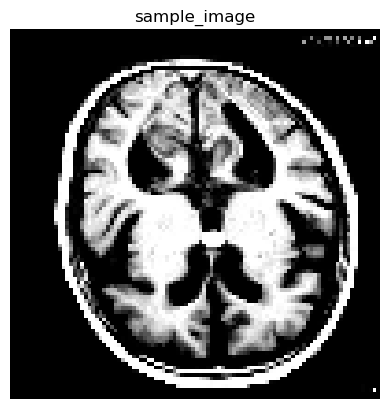

In [3]:
x,y=load_data(['yes','no'],(100,100))
print(x[2])
print(y[2])
plt.imshow(x[2], cmap='gray')
plt.axis('off')
plt.title('sample_image')

# splitting data
- 0.8 persent for training
- 0.2 persent for testing and evaluating

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape,(y_train).shape)
print(x_test.shape,(y_test).shape)
x_train.reshape(-1,100,100,1)   
x_test.reshape(-1,100,100,1)
 

(2400, 100, 100) (2400, 1)
(600, 100, 100) (600, 1)


array([[[[0.01176471],
         [0.01176471],
         [0.01960784],
         ...,
         [0.01176471],
         [0.00784314],
         [0.00784314]],

        [[0.01176471],
         [0.01176471],
         [0.01960784],
         ...,
         [0.01176471],
         [0.01960784],
         [0.01960784]],

        [[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.01176471],
         [0.01960784],
         [0.01960784]],

        ...,

        [[0.01960784],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]],

        [[0.01960784],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]],

        [[0.01960784],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]]],


       [[[0.00392157],
         [0.00392157],
         [0.00

# Build Model



In [15]:
Model = keras.models.Sequential([
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(70,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(60,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(2,activation='softmax') ,    
        ])

In [16]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 150)       1500      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       202650    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 70)        75670     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 60)        37860     
                                                        

In [6]:
Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
epochs = 17
Model = Model.fit(x_train, y_train, epochs=epochs,batch_size=64,verbose=1)

# saving trained model

In [12]:
import pickle
with open("tumor_trained_model_by_parham",'wb') as f :
    pickle.dump(Model,f)

# load training model

In [5]:
import pickle
with open("tumor_trained_model_by_parham",'rb') as f : 
    Model=pickle.load(f)

# evaluating

In [41]:
Model_loss, Model_accuracy = Model.evaluate(x_test, y_test)

print(f"it is Model accuracy: {Model_accuracy}")
print(f'it is Model loss: {Model_loss}')

C:\Users\GIGA\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


19/19 [==============================] - 7s 367ms/step - loss: 0.0770 - accuracy: 0.9750
it is Model accuracy: 0.9750000238418579
it is Model loss: 0.07703626155853271


In [8]:
y_hat = Model.predict(x_test)
y_hat=replace_argmax(y_hat)



19/19 [==============================] - 7s 345ms/step


# F1 score

In [42]:
y_hat = Model.predict(x_test)
y_hat=replace_argmax(y_hat)
f1=f1_score(y_test, y_hat)
print(f'F1 Score: {f1}')


19/19 [==============================] - 7s 366ms/step
F1 Score: 0.9746192893401014


# plot loss and accuracy in each epoch

In [13]:
g=0
lst=[]
for item in range(len(x_test)) :
    
    if y_hat[item]==y_test[item]:
        g+=1
        
    else :
        lst.append(item)
        
print(g/len(x_test))
print(lst)

0.9816666666666667
[47, 100, 167, 273, 363, 467, 486, 501, 520, 559, 581]
